<a href="https://colab.research.google.com/github/Hatim2211/Bank-System-/blob/main/BreastCancerDetetion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

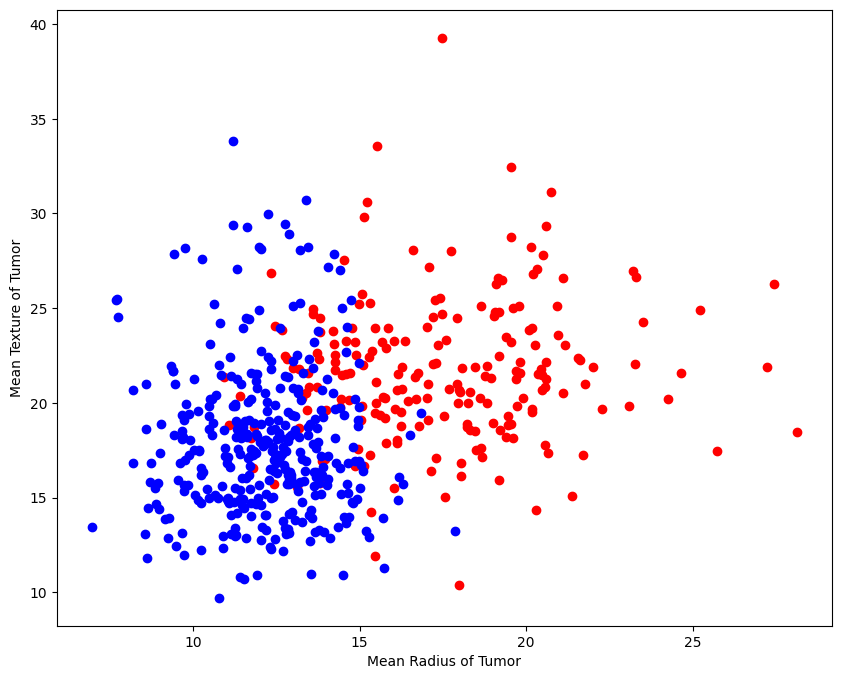

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Initialize a list to store the data for each target (malignant or benign)
X = []

# Loop through each target (0 for malignant, 1 for benign)
for target in range(2):
    # Create a sublist for each target to store the specific data
    X.append([[], []])

    # Loop through the cancer data to categorize by target (malignant or benign)
    for i in range(len(cancer.data)):
        if cancer.target[i] == target:
            # Append the data values to the respective lists for each target
            X[target][0].append(cancer.data[i][0])  # Mean Radius of Tumor
            X[target][1].append(cancer.data[i][1])  # Mean Texture of Tumor

# Define the colors for the scatter plot (red for malignant, blue for benign)
colors = ("r", "b")  # 'r' for malignant, 'b' for benign

# Create a figure and axis for plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

# Loop through each target to plot the data
for target in range(2):
    # Scatter plot each target's data with the corresponding color
    ax.scatter(X[target][0], X[target][1], c=colors[target])

# Set the labels for the x and y axes
ax.set_xlabel("Mean Radius of Tumor")
ax.set_ylabel("Mean Texture of Tumor")

# Display the plot
plt.show()

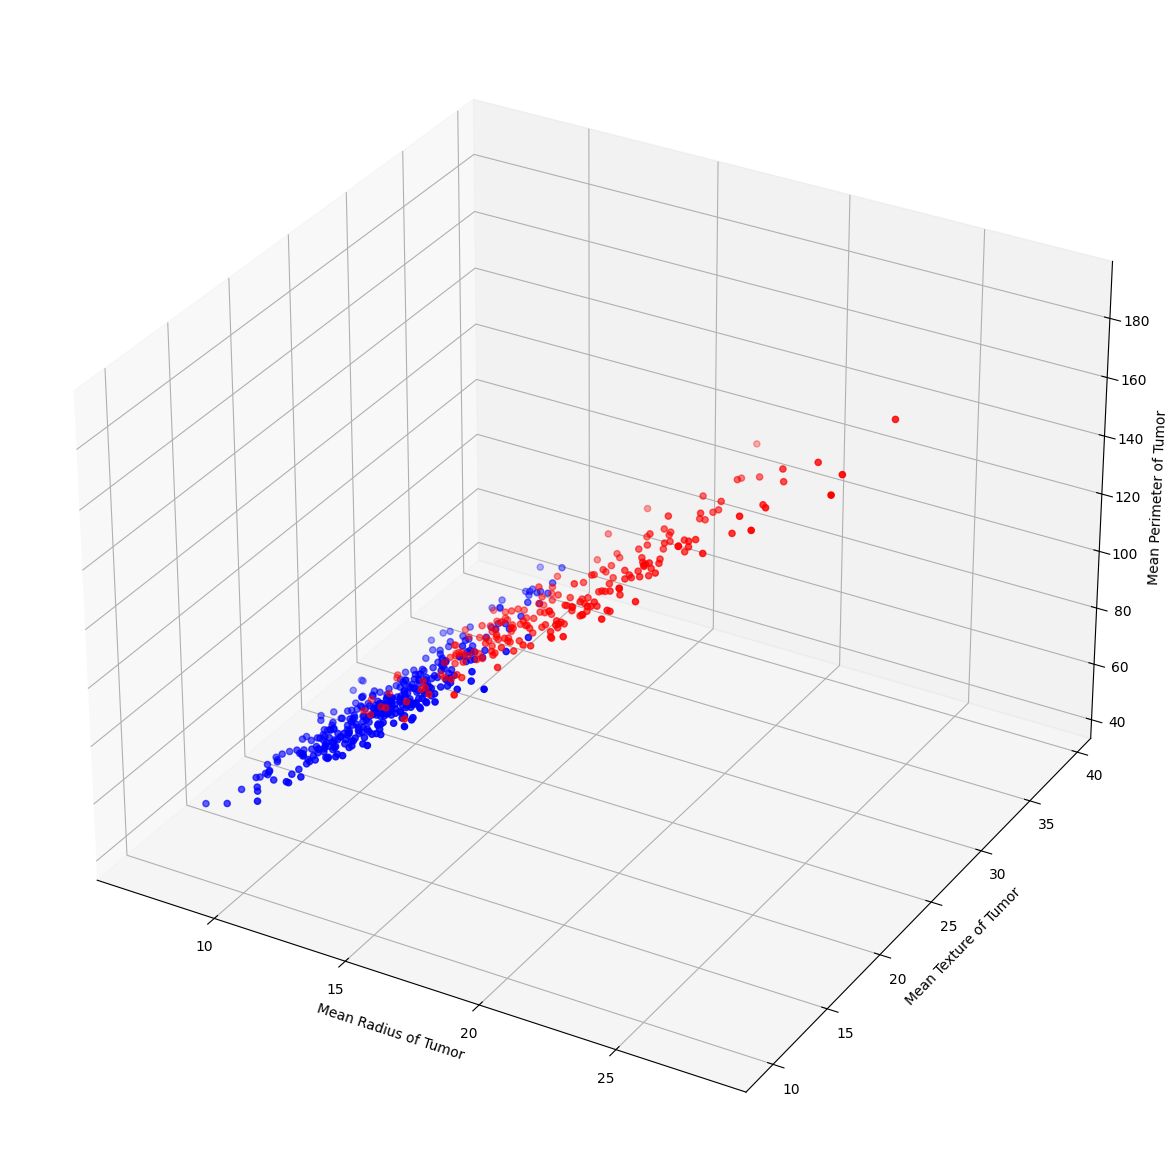

In [ ]:
# Load the breast cancer dataset
cancer = load_breast_cancer()

# Initialize a list to store the data for each target (malignant or benign)
X = []

# Loop through each target (0 for malignant, 1 for benign)
for target in range(2):
    # Create a sublist for each target to store specific data (3 attributes)
    X.append([[], [], []])

    # Loop through the cancer data to categorize by target (malignant or benign)
    for i in range(len(cancer.data)):
        if cancer.target[i] == target:
            # Append the respective data values to the lists for each target
            X[target][0].append(cancer.data[i][0])  # Mean Radius of Tumor
            X[target][1].append(cancer.data[i][1])  # Mean Texture of Tumor
            X[target][2].append(cancer.data[i][2])  # Mean Perimeter of Tumor

# Define the colors for the scatter plot (red for malignant, blue for benign)
colors = ("r", "b")  # 'r' for malignant, 'b' for benign

# Create a figure with a larger size for better visualization
fig = plt.figure(figsize=(18, 15))

# Add a 3D subplot to the figure
ax = fig.add_subplot(111, projection="3d")

# Loop through each target to plot the data points in 3D
for target in range(2):
    # Scatter plot each target's data with the corresponding color
    ax.scatter(X[target][0], X[target][1], X[target][2], c=colors[target])

# Set the labels for the x, y, and z axes
ax.set_xlabel("Mean Radius of Tumor")
ax.set_ylabel("Mean Texture of Tumor")
ax.set_zlabel("Mean Perimeter of Tumor")

# Display the 3D plot
plt.show()

<ipython-input-7-87cc6fa191c9>:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, facecolors="none", edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]), cmap=colors)


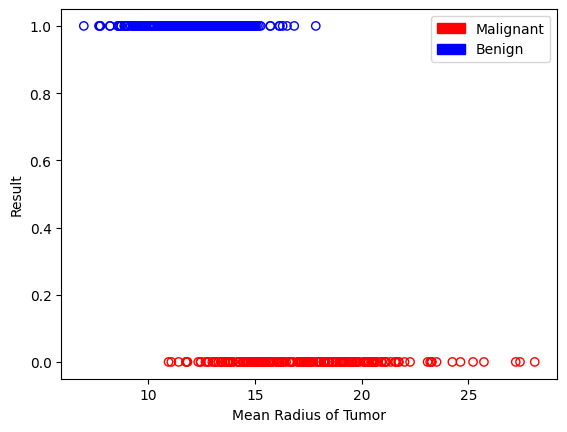

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the breast cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# Extract the first feature (Mean Radius of Tumor) and target (Malignant or Benign)
x = cancer.data[:, 0]  # Mean Radius of Tumor
y = cancer.target      # Target variable (0: Malignant, 1: Benign)

# Define the colors for each target: red for Malignant, blue for Benign
colors = {0: "red", 1: "blue"}  # 0 is Malignant, 1 is Benign

# Scatter plot the data points with no fill color, but with edge color based on the target
plt.scatter(x, y, facecolors="none", edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]), cmap=colors)

# Set labels for the x and y axes
plt.xlabel("Mean Radius of Tumor")
plt.ylabel("Result")

# Create legend patches to represent Malignant (red) and Benign (blue)
red = mpatches.Patch(color="red", label="Malignant")
blue = mpatches.Patch(color="blue", label="Benign")

# Display the legend in the top right corner
plt.legend(handles=[red, blue], loc=1)

# Show the plot
plt.show()

In [ ]:
from sklearn import linear_model
import numpy as np

# Initialize a logistic regression model
log_regress = linear_model.LogisticRegression()

# Training the model
# X is the feature array (Mean Radius of Tumor), reshaped to match the model's expected input
# y is the target variable (Malignant or Benign)
log_regress.fit(X=np.array(x).reshape(len(x), 1), y=y)

# Print the trained model intercept (the bias term of the logistic regression model)
print(log_regress.intercept_)

# Print the trained model coefficients (the weight assigned to the input feature)
print(log_regress.coef_)

[15.12718591]
[[-1.02519623]]


<ipython-input-13-d218798867b6>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, facecolors="none", edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]), cmap=colors)


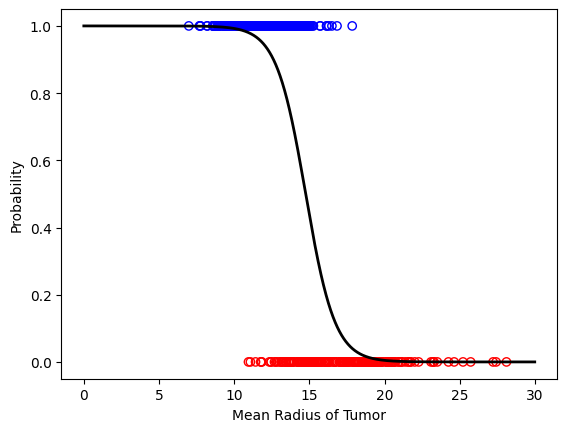

In [ ]:
def sigmoid(x):
    # Sigmoid function for logistic regression
    return 1 / (1 + np.exp(-(log_regress.intercept_[0] + (log_regress.coef_[0][0] * x))))
    # The function takes an input x and returns the predicted probability using the logistic regression equation

# Generate a range of x values (Mean Radius of Tumor) for plotting the sigmoid curve
x1 = np.arange(0, 30, 0.01)

# Apply the sigmoid function to each value in x1 to generate corresponding y values (probabilities)
y1 = [sigmoid(n) for n in x1]

# Create a scatter plot of the data points (Malignant: red, Benign: blue)
plt.scatter(x, y, facecolors="none", edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x: colors[x]), cmap=colors)

# Plot the logistic regression curve (sigmoid curve)
plt.plot(x1, y1, color='black', linewidth=2)

# Set the labels for the x and y axes
plt.xlabel("Mean Radius of Tumor")
plt.ylabel("Probability")

# Display the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
# `train_set` contains the training data (75% of the dataset)
# `test_set` contains the test data (25% of the dataset)
# `train_labels` contains the labels (Malignant or Benign) for the training data
# `test_labels` contains the labels for the test data
train_set, test_set, train_labels, test_labels = train_test_split(
    cancer.data,  # Features (Mean Radius, Mean Texture, etc.)
    cancer.target,  # Labels (Malignant or Benign)
    test_size=0.25,  # Use 25% of the data for testing, and the rest for training
    random_state=1,  # Ensure reproducibility of the split (same split every time)
    stratify=cancer.target  # Maintain the same distribution of target classes in both training and test sets
)


In [ ]:
from sklearn import linear_model

# Select the first 30 features for training
x = train_set[:, 0:30]

# Target labels for training
y = train_labels

# Initialize the Logistic Regression model
log_regress = linear_model.LogisticRegression(solver='liblinear')  # Added solver argument to ensure compatibility

# Train the logistic regression model on the data
log_regress.fit(X=x, y=y)

LogisticRegression(solver='liblinear')

In [ ]:
import pandas as pd

# Predict the probabilities for each class (Malignant, Benign) using the trained model
# `predict_proba` returns probabilities for each class (Malignant and Benign) for each sample in the test set
preds_prob = pd.DataFrame(log_regress.predict_proba(X = test_set))

# Assign column names to the probabilities dataframe: "Malignant" and "Benign"
preds_prob.columns = ["Malignant", "Benign"]

# Predict the class labels (Malignant or Benign) for each sample in the test set
preds = log_regress.predict(X = test_set)

# Convert the predictions into a DataFrame with the column name "Prediction"
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]

# Create a DataFrame for the original results (test labels), with the column name "Original Results"
original_results = pd.DataFrame(test_labels)
original_results.columns = ["Original Results"]

# Concatenate the predicted probabilities, predicted classes, and the original test labels into one DataFrame
# This allows you to compare the predicted probabilities, predicted classes, and the actual class labels side by side
results = pd.concat([preds_prob, preds_class, original_results], axis = 1)

# Display the first few rows of the results DataFrame
print(results.head())

   Malignant        Benign  Prediction  Original Results
0   0.999812  1.883649e-04           0                 0
1   0.998355  1.644596e-03           0                 0
2   0.057996  9.420045e-01           1                 1
3   1.000000  9.697900e-08           0                 0
4   0.207181  7.928187e-01           1                 0


In [ ]:
# Print a message indicating the start of confusion matrix output
print("---- Confusion Matrix----")

# Generate and print the confusion matrix using `pd.crosstab()`
# The confusion matrix compares the predicted values (`preds`) with the actual values (`test_labels`)
# `pd.crosstab(preds, test_labels)` creates a contingency table that shows how many times
# each predicted class (Malignant or Benign) corresponds to the actual class labels (Malignant or Benign).
print(pd.crosstab(preds, test_labels))

---- Confusion Matrix----
col_0   0   1
row_0        
0      48   3
1       5  87
